In [1]:
x = [2, 4,6,8]
y = [81,93,91,97]

In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()

'Malgun Gothic'

In [4]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

Text(0.5, 1.0, '공부시간에 따른 성적')

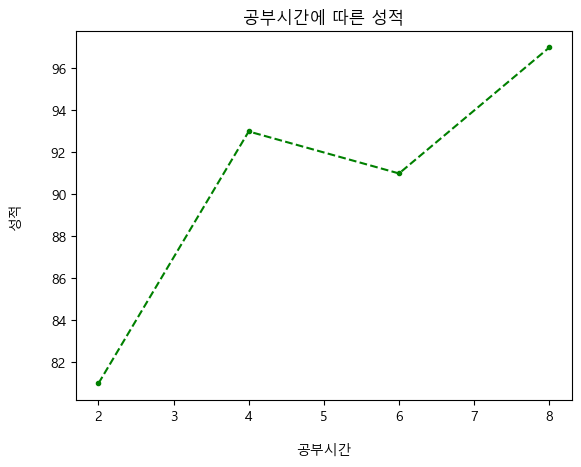

In [22]:
plt.plot(x, y, 'g.--')
plt.xlabel('공부시간', labelpad=15)
plt.ylabel('성적', labelpad=20)
plt.title('공부시간에 따른 성적')

In [23]:
import numpy as np
from scipy import stats

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(f'기울기, 가중치: {slope}')
print(f'절편, 편향: {intercept}')
print(f'회귀예측식: y = {slope}*x + {intercept}')

기울기, 가중치: 2.3
절편, 편향: 79.0
회귀예측식: y = 2.3*x + 79.0


In [25]:
x_min = np.min(x)
x_max = np.max(x)

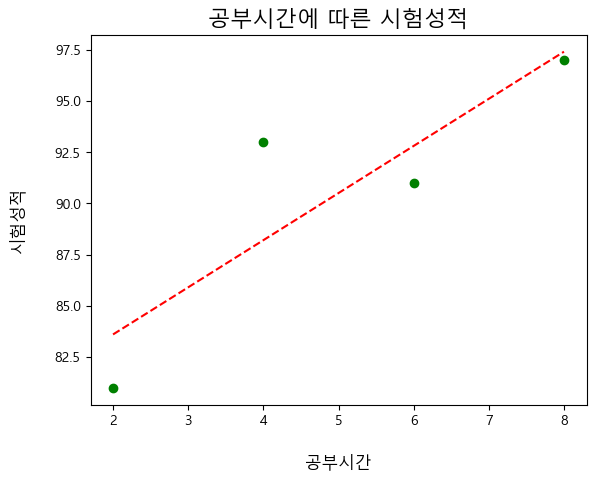

In [35]:
x1 = np.linspace(x_min, x_max,1000, endpoint=True, retstep=False)
y1 = slope * x1 + intercept

plt.plot(x, y, 'go')
plt.xlabel('공부시간', size = 12, labelpad=20)
plt.ylabel('시험성적', size = 12, labelpad= 20 )
plt.title('공부시간에 따른 시험성적', size = 16)

plt.plot(x1, y1, 'r--')

In [37]:
x_mean = (x[0]+x[1]+x[2]+x[3]) / len(x)
y_mean = (y[0]+y[1]+y[2]+y[3]) / len(y)

print(x_mean)
print(y_mean)


5.0
90.5


In [39]:
import numpy as np
x_mean2 = np.mean(x)
y_mean2 = np.mean(y)
print(x_mean2)
print(y_mean2)



5.0
90.5


20

In [40]:
#편차
x_dev = [i - x_mean for i in x]
y_dev = [k - y_mean for k in y]

print(x_dev)
print(y_dev)

[-3.0, -1.0, 1.0, 3.0]
[-9.5, 2.5, 0.5, 6.5]


In [42]:
#분산

x_temop = [(i - x_mean)**2 for i in x]
x_var=sum(x_temop) / len(x)

y_tempo = [(k - y_mean)**2 for k in y]
y_var = sum(y_tempo) / len(y)

print(f'x분산: {x_var3:0.3f}')
print(f'x분산: {y_var3:0.3f}')

x분산: 5.000
x분산: 34.750


In [44]:
xy_tmp = (x[0] - x_mean)*(y[0] - y_mean) + (x[1] - x_mean)*(y[1] - y_mean) + (x[2] - x_mean)*(y[2] - y_mean) + (x[3] - x_mean)*(y[3] - y_mean)

#공분산
xy_cov = xy_tmp / len(x)
#기울기
a = xy_cov / x_var

b= y_mean - (a*x_mean)
print(b)

79.0


In [49]:
y_pred = [(a*i)+ b for i in x]
print(y_pred)

y_err = np.array(y) - np.array(y_pred)

print('x 실제 값:', x)
print('y 실제 값:', y)
print('예측 y:', y_pred)
print('오차:', y_err)

[83.6, 88.2, 92.8, 97.4]
x 실제 값: [2, 4, 6, 8]
y 실제 값: [81, 93, 91, 97]
예측 y: [83.6, 88.2, 92.8, 97.4]
오차: [-2.6  4.8 -1.8 -0.4]


In [54]:
import pandas as pd

result = pd.DataFrame({
    'x 실제 값': x,
    'y 실제 값': y,
    '예측 y': y_pred,
    '오차': y_err})
result

,x 실제 값,y 실제 값,예측 y,오차
0,2,81,83.6,-2.6
1,4,93,88.2,4.8
2,6,91,92.8,-1.8
3,8,97,97.4,-0.4


In [ ]:
mse_tmp = [i**2 for i in y_err]


In [57]:
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
df = pd.read_csv('C:/machine_learning/pyml/data/study_score_single_regression.csv')

In [62]:
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   score   20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [64]:
df.describe()

,hour,score
count,20.000000,20.000000
mean,5.000000,52.000000
std,2.563509,27.422618
min,0.500000,8.000000
25%,3.050000,29.000000
50%,5.150000,58.000000
75%,6.375000,72.000000
max,10.000000,100.000000


In [67]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(x)
print(y)

    hour
0    0.5
1    1.2
2    1.8
3    2.4
4    2.6
5    3.2
6    3.9
7    4.4
8    4.5
9    5.0
10   5.3
11   5.8
12   6.0
13   6.1
14   6.2
15   6.9
16   7.2
17   8.4
18   8.6
19  10.0
0      10
1       8
2      14
3      26
4      22
5      30
6      42
7      48
8      38
9      58
10     60
11     72
12     62
13     68
14     72
15     58
16     76
17     86
18     90
19    100
Name: score, dtype: int64


In [68]:
print(len(x))

20


In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [71]:
reg.fit(x,y)

LinearRegression()

In [72]:
reg.coef_

array([10.44369694])

In [73]:
reg.intercept_

-0.218484702867201

In [74]:
print(f'예측치 : y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}')

예측치 : y = 10.44x + -0.22


In [75]:
y_pred = reg.predict(x)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

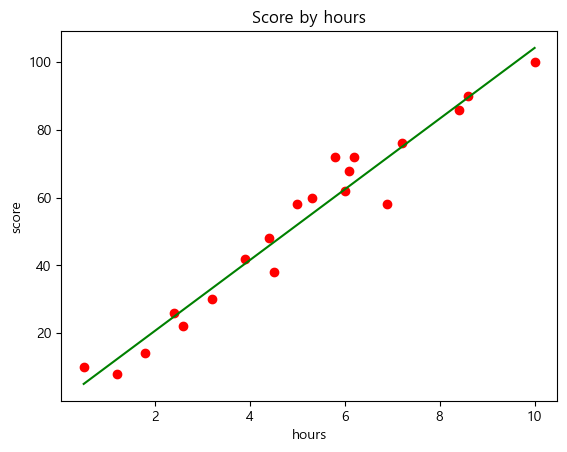

In [76]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = mean_squared_error(y,y_pred, squared=False)

print(mae, mse, rmse)

4.582252122377063 33.470959474611576 5.785409188174297


In [81]:
reg.score(x,y)

0.9531481530310588

In [82]:
from sklearn.metrics import r2_score

r2_score(y,y_pred)

0.9531481530310588

In [85]:
print('9시간 공부했을 때 예상 점수: ', reg.predict([[9]]))

9시간 공부했을 때 예상 점수:  [93.77478776]


In [86]:
X_new = [9.8, 3.5, 5, 5.7, 3, 7, 8.2, 2, 9, 6.2]
X_new

[9.8, 3.5, 5, 5.7, 3, 7, 8.2, 2, 9, 6.2]

In [99]:
for i in X_new:
    result = reg.predict([[i]])[0]
    print(f'공부시간이 {i:>3.1f}일때 예상시험점수는 {result:>5.1f}점입니다.')

공부시간이 9.8일때 예상시험점수는 102.1점입니다.
공부시간이 3.5일때 예상시험점수는  36.3점입니다.
공부시간이 5.0일때 예상시험점수는  52.0점입니다.
공부시간이 5.7일때 예상시험점수는  59.3점입니다.
공부시간이 3.0일때 예상시험점수는  31.1점입니다.
공부시간이 7.0일때 예상시험점수는  72.9점입니다.
공부시간이 8.2일때 예상시험점수는  85.4점입니다.
공부시간이 2.0일때 예상시험점수는  20.7점입니다.
공부시간이 9.0일때 예상시험점수는  93.8점입니다.
공부시간이 6.2일때 예상시험점수는  64.5점입니다.


In [100]:
df = pd.read_csv('C:/machine_learning/pyml/data/study_score_single_regression.csv')

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [102]:
print(x)

    hour
0    0.5
1    1.2
2    1.8
3    2.4
4    2.6
5    3.2
6    3.9
7    4.4
8    4.5
9    5.0
10   5.3
11   5.8
12   6.0
13   6.1
14   6.2
15   6.9
16   7.2
17   8.4
18   8.6
19  10.0


In [103]:
print(y)

0      10
1       8
2      14
3      26
4      22
5      30
6      42
7      48
8      38
9      58
10     60
11     72
12     62
13     68
14     72
15     58
16     76
17     86
18     90
19    100
Name: score, dtype: int64


In [107]:
print(x_test)
print()
print(x_train)

    hour
18   8.6
1    1.2
19  10.0
8    4.5

    hour
10   5.3
17   8.4
6    3.9
13   6.1
4    2.6
2    1.8
5    3.2
14   6.2
9    5.0
7    4.4
16   7.2
11   5.8
3    2.4
0    0.5
15   6.9
12   6.0


In [108]:
print(y_test)
print()
print(y_train)

18     90
1       8
19    100
8      38
Name: score, dtype: int64

10    60
17    86
6     42
13    68
4     22
2     14
5     30
14    72
9     58
7     48
16    76
11    72
3     26
0     10
15    58
12    62
Name: score, dtype: int64


In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [110]:
reg.fit(x_train, y_train)

LinearRegression()

In [111]:
reg.coef_

array([10.49161294])

In [113]:
reg.intercept_

0.6115562905169369

In [128]:
y_train_pred = reg.predict(x_train)
print('x 훈련셋 예측치: ', y_train_pred)
print('*'*70)
y_test_pred = reg.predict(x_test)
print('x 테스트셋 예측치: ', y_test_pred)

x 훈련셋 예측치:  [56.21710486 88.74110496 41.52884675 64.61039521 27.88974993 19.49645958
 34.18471769 65.6595565  53.06962098 46.77465321 76.15116944 61.46291133
 25.79142734  5.85736276 73.00368556 63.56123391]
**********************************************************************
x 테스트셋 예측치:  [ 90.83942755  13.20149182 105.52768566  47.82381451]


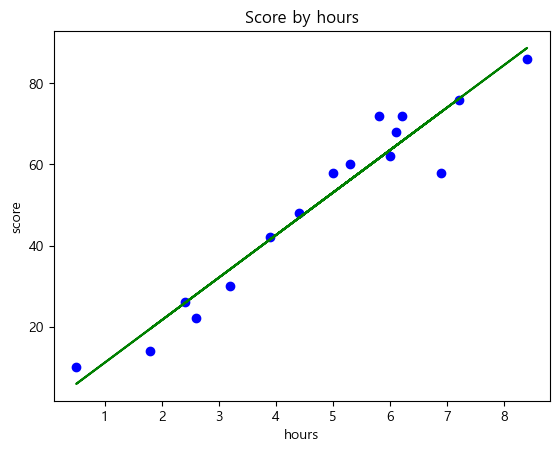

In [119]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, y_train_pred, color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


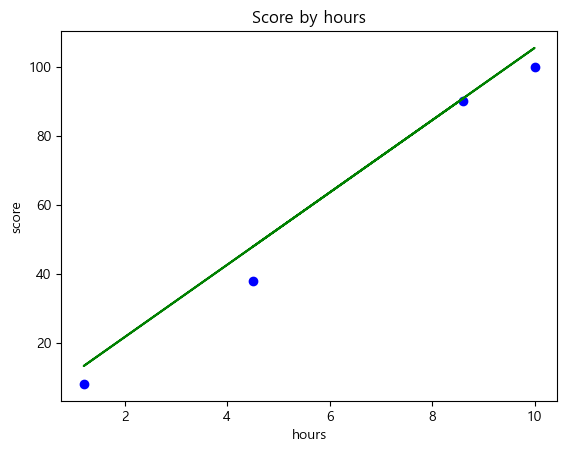

In [122]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, y_test_pred, color = 'green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [126]:
#훈련셋 오차계산
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmase = mean_squared_error(y_train, y_train_pred, squared=False)

print(mae, mse, rmse)

#0에 가까울수록 좋다

4.378515133656444 33.6103028490505 5.785409188174297


In [129]:
#테스트셋 오차계산
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmase = mean_squared_error(y_test, y_test_pred, squared=False)

print(mae, mse, rmse)

5.348104884463481 38.705699000526906 5.785409188174297


In [130]:
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.9356663661221668

In [131]:
reg.score(x_test, y_test)

0.9727616474310156

In [132]:
##경사하강법

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [138]:
df = pd.read_csv('C:/machine_learning/pyml/data/study_score_single_regression.csv')

In [139]:
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   score   20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [142]:
df.describe()

,hour,score
count,20.000000,20.000000
mean,5.000000,52.000000
std,2.563509,27.422618
min,0.500000,8.000000
25%,3.050000,29.000000
50%,5.150000,58.000000
75%,6.375000,72.000000
max,10.000000,100.000000


In [143]:
x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 100)

In [150]:
print(x_test)
print()
print(x_train)

    hour
17   8.4
19  10.0
11   5.8
18   8.6

    hour
13   6.1
6    3.9
16   7.2
1    1.2
9    5.0
14   6.2
12   6.0
5    3.2
2    1.8
4    2.6
10   5.3
0    0.5
15   6.9
7    4.4
3    2.4
8    4.5


In [151]:
print(y_test)
print()
print(y_train)

17     86
19    100
11     72
18     90
Name: score, dtype: int64

13    68
6     42
16    76
1      8
9     58
14    72
12    62
5     30
2     14
4     22
10    60
0     10
15    58
7     48
3     26
8     38
Name: score, dtype: int64


In [210]:
from sklearn.linear_model import SGDRegressor

sr = SGDRegressor(max_iter=10000, eta0 = 0.001, random_state=100, verbose = 1)

In [211]:
sr.fit(x_train, y_train)

-- Epoch 1
Norm: 2.20, NNZs: 1, Bias: 0.403348, T: 16, Avg. loss: 926.830813
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.39, NNZs: 1, Bias: 0.629072, T: 32, Avg. loss: 625.356899
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.27, NNZs: 1, Bias: 0.798089, T: 48, Avg. loss: 463.010232
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.97, NNZs: 1, Bias: 0.932770, T: 64, Avg. loss: 355.653024
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.56, NNZs: 1, Bias: 1.043764, T: 80, Avg. loss: 279.006322
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.05, NNZs: 1, Bias: 1.136905, T: 96, Avg. loss: 222.469712
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 6.47, NNZs: 1, Bias: 1.216295, T: 112, Avg. loss: 179.955286
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 6.84, NNZs: 1, Bias: 1.284447, T: 128, Avg. loss: 147.452839
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 7.15, NNZs: 1, Bias: 1.343523, T: 144, Avg. loss: 122.123074
Total training time: 0.0

SGDRegressor(eta0=0.001, max_iter=10000, random_state=100, verbose=1)

In [212]:
sr.coef_

array([10.03956716])

In [213]:
sr.intercept_

array([1.61092346])

In [214]:
y_train_pred = sr.predict(x_train)
y_train_pred

array([62.85228315, 40.76523539, 73.89580703, 13.65840405, 51.80875927,
       63.85623986, 61.84832643, 33.73753838, 19.68214435, 27.71379808,
       54.82062942,  6.63070704, 70.88393688, 45.78501897, 25.70588465,
       46.78897569])

In [215]:
y_test_pred = sr.predict(x_test)
y_test_pred

array([ 85.94328762, 102.00659508,  59.840413  ,  87.95120105])

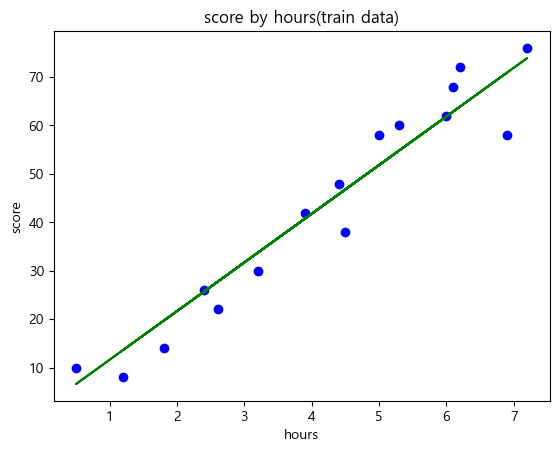

In [216]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, y_train_pred, color='green')
plt.title('score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

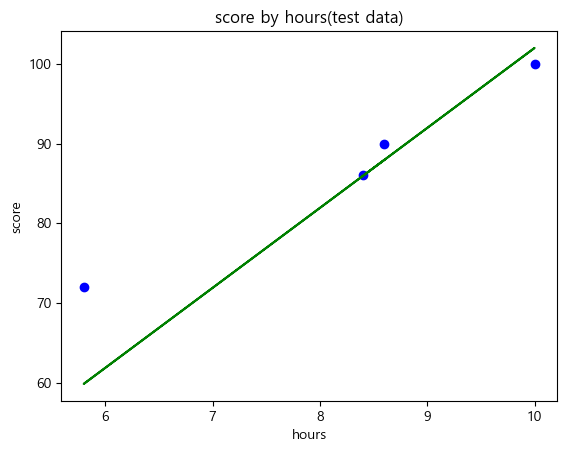

In [217]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_test_pred, color='green')
plt.title('score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [218]:
#도출된 선형회귀 예측모델 성능평가

# 훈련셋 오차계산

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)

print(mae, mse, rmse)

4.7809941389272685 33.403757583767664 5.779598392948048


In [219]:
# 테스트셋 오차계산

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(mae, mse, rmse)

4.067923352198905 39.02069332224082 6.246654570427343


In [220]:
sr.score(x_train, y_train)

0.931117396398984

In [223]:
# 라이브러리 이용
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)



0.931117396398984

In [224]:
# 라이브러리 이용
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)


0.613656501759992

In [225]:
##다중선형회귀

In [226]:
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
import warnings
warnings.filterwarnings(action='ignore')


In [229]:
df = pd.read_csv('C:/machine_learning/pyml/data/study_score_multiple_regression.csv')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    20 non-null     float64
 1   absent  20 non-null     int64  
 2   place   20 non-null     object 
 3   score   20 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [231]:
df.describe(include='object')

,place
count,20
unique,3
top,Library
freq,7


In [233]:
df

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22
5,3.2,0,Home,30
6,3.9,0,Library,42
7,4.4,0,Library,48
8,4.5,5,Home,38
9,5.0,1,Cafe,58


In [234]:
x = df.iloc[:, : -1] #마지막 컬럼 직전까지
y = df.iloc[:,-1] #마지막 컬럼만

In [237]:
print(len(x))
print(x.describe())

20
            hour     absent
count  20.000000  20.000000
mean    5.000000   1.600000
std     2.563509   1.535544
min     0.500000   0.000000
25%     3.050000   0.000000
50%     5.150000   1.000000
75%     6.375000   2.250000
max    10.000000   5.000000


In [246]:
#피처변수(독립변수)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers= [('encoder', 
                                        OneHotEncoder(drop = 'first'),
                                        [2])],
                        remainder= 'passthrough')



In [249]:
X = ct.fit_transform(x)
X

array([[ 1. ,  0. ,  0.5,  3. ],
       [ 0. ,  1. ,  1.2,  4. ],
       [ 0. ,  0. ,  1.8,  2. ],
       [ 0. ,  0. ,  2.4,  0. ],
       [ 1. ,  0. ,  2.6,  2. ],
       [ 1. ,  0. ,  3.2,  0. ],
       [ 0. ,  1. ,  3.9,  0. ],
       [ 0. ,  1. ,  4.4,  0. ],
       [ 1. ,  0. ,  4.5,  5. ],
       [ 0. ,  0. ,  5. ,  1. ],
       [ 0. ,  0. ,  5.3,  2. ],
       [ 0. ,  0. ,  5.8,  0. ],
       [ 0. ,  1. ,  6. ,  3. ],
       [ 0. ,  0. ,  6.1,  1. ],
       [ 0. ,  1. ,  6.2,  1. ],
       [ 1. ,  0. ,  6.9,  4. ],
       [ 0. ,  0. ,  7.2,  2. ],
       [ 1. ,  0. ,  8.4,  1. ],
       [ 0. ,  1. ,  8.6,  1. ],
       [ 0. ,  1. , 10. ,  0. ]])

In [257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [256]:
print(X_train)

NameError: name 'X_train' is not defined